In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
full = cv2.imread("DATA/sammy.jpg")
full = cv2.cvtColor(full,cv2.COLOR_BGR2RGB)

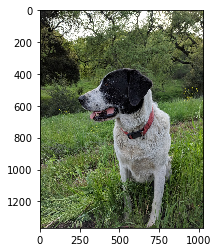

In [4]:
plt.imshow(full)

In [6]:
face = cv2.imread("DATA/sammy_face.jpg")
face = cv2.cvtColor(face,cv2.COLOR_BGR2RGB)

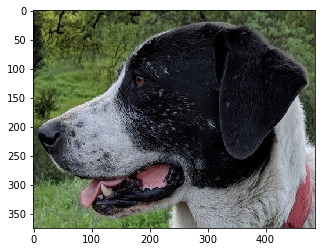

In [7]:
plt.imshow(face)

In [11]:
# All the 6 methods for comaprison a list
# Note how we are using strings, later on we'll ise the eval() function to convert to function
methods = ['cv2.TM_CCOEFF','cv2.TM_CCOEFF_NORMED','cv2.TM_CCORR','cv2.TM_SQDIFF','cv2.TM_SQDIFF_NORMED']

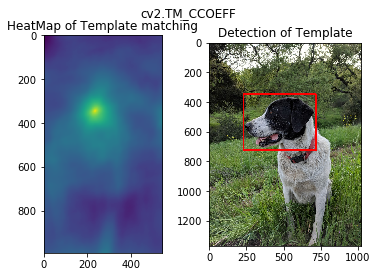

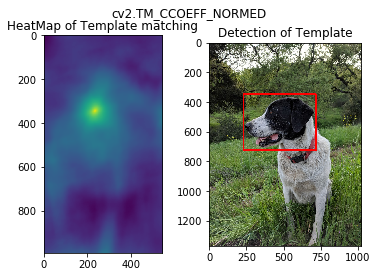

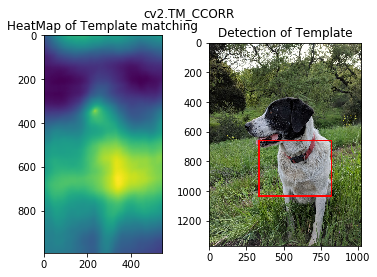

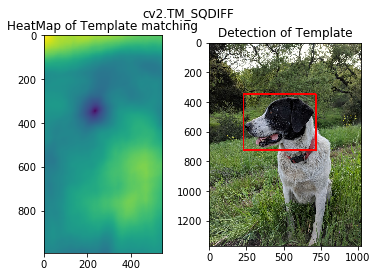

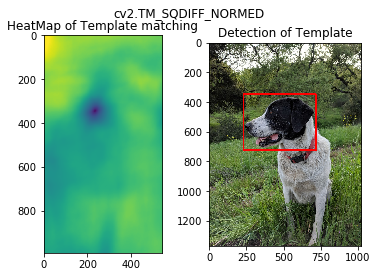

In [12]:
for m in methods:
    
    # Create A Copy
    
    full_copy = full.copy()
    
    method = eval(m)
    
    # Template matching 
    
    res = cv2.matchTemplate(full_copy,face,method)
    
    min_value,max_value,min_loc,max_loc = cv2.minMaxLoc(res)
    
    if method in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
        
    height,width,channels = face.shape
    bottom_right = (top_left[0]+width,top_left[1]+height)
    
    cv2.rectangle(full_copy,top_left,bottom_right,(255,0,0),10)
    
    # Plot and show the images
    
    
    plt.subplot(121)
    plt.imshow(res)
    plt.title("HeatMap of Template matching")
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title("Detection of Template")
    
    # Title with the Method used
    plt.suptitle(m)        # Super Title
    plt.show()
    
    print('\n')
    print('\n')
    